### Import libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# from nltk import word_tokenize

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier,  VotingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

from nltk import word_tokenize, WordNetLemmatizer



#from sklearn.datasets import fetch_openml
#from imblearn.datasets import make_imbalance


# from nltk.stem import WordNetLemmatizer
# from sklearn.tree import DecisionTreeClassifier




In [18]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [19]:
#media, permalink, is_self, is_video, is_..., 

### Import dataframes, pull needed data

In [20]:
ul_df = pd.read_csv('../data/upliftingnews_posts_dates.csv')
ul_df.head()

author  created_utc         domain  \
0     thesingerguy   1650842423    youtube.com   
1         8412risk   1650835426    nbcnews.com   
2         DianeVuk   1650831110        npr.org   
3          scot816   1650828352        cnn.com   
4  Complete-Ad1447   1650826520  crackboxs.com   

                                                 url  \
0  https://youtube.com/watch?v=vLIkBaE2_f8&amp;fe...   
1  https://www.nbcnews.com/news/us-news/californi...   
2  https://www.npr.org/2022/04/24/1093228643/stud...   
3  https://www.cnn.com/2022/04/24/us/tracey-meare...   
4             https://crackboxs.com/bytefence-crack/   

                                               title      subreddit  
0  Cover Tribute to ED SHEERAN: "The Joker And Th...  UpliftingNews  
1  California man arrested and charged after maki...  UpliftingNews  
2  Giving a stranger a new life: One student's st...  UpliftingNews  
3  Black woman named valedictorian nearly 40 year...  UpliftingNews  
4  ByteFence Crack 5.7.1.0 With License Key Free ...  UpliftingNews

In [21]:
w_df = pd.read_csv('../data/worldnews_posts_dates.csv')
w_df.head(6)

author  created_utc             domain  \
0  agnes1223334444   1650844221         abc.net.au   
1        Thalesian   1650843031  independent.co.uk   
2      WordFit8789   1650842919           youtu.be   
3           dromni   1650842878  timesofisrael.com   
4  worldbookreader   1650842798  republicworld.com   
5   Handicapreader   1650842754        reuters.com   

                                                 url  \
0  https://www.abc.net.au/news/2022-04-25/jbs-mea...   
1  https://www.independent.co.uk/climate-change/n...   
2                       https://youtu.be/WV_7GaD7Nzk   
3  https://www.timesofisrael.com/liveblog_entry/r...   
4  https://www.republicworld.com/world-news/russi...   
5  https://www.reuters.com/world/europe/police-te...   

                                               title  subreddit  
0  What you need to know about the global giant b...  worldnews  
1  Climate activist dies after setting himself on...  worldnews  
2  Emmanuel Macron re-elected: the French preside...  worldnews  
3  Report: Putin 'loses interest' in Ukraine deal...  worldnews  
4  Putin to interact with Russian leaders in St. ...  worldnews  
5  Police teargas Paris protestors after Macron r...  worldnews

In [22]:
ul_df['subreddit'] = ul_df['subreddit'].str.lower()

In [23]:
# type(w_title_df) #.head()

In [24]:
df = pd.concat([ul_df[['title', 'subreddit']], w_df[['title', 'subreddit']]])

In [25]:
ul_df.shape, w_df.shape, df.shape

((3998, 6), (51718, 6), (55716, 2))

In [26]:
df = df.reset_index().drop(columns='index')

In [27]:
df

title      subreddit
0      Cover Tribute to ED SHEERAN: "The Joker And Th...  upliftingnews
1      California man arrested and charged after maki...  upliftingnews
2      Giving a stranger a new life: One student's st...  upliftingnews
3      Black woman named valedictorian nearly 40 year...  upliftingnews
4      ByteFence Crack 5.7.1.0 With License Key Free ...  upliftingnews
...                                                  ...            ...
55711  U.S. corporations suspend business in Russia, ...      worldnews
55712                 Putin speaks about Nato expansion.      worldnews
55713  Ukraine's ambassador to U.S. says Russia used ...      worldnews
55714    Russia has used vacuum bomb, says Ukraine envoy      worldnews
55715  ‘The damage is done’: Russians face economic p...      worldnews

[55716 rows x 2 columns]

In [28]:
#Remove non-english words
df.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

In [29]:
df.head()

title      subreddit
0  Cover Tribute to ED SHEERAN: "The Joker And Th...  upliftingnews
1  California man arrested and charged after maki...  upliftingnews
2  Giving a stranger a new life: One student's st...  upliftingnews
3  Black woman named valedictorian nearly 40 year...  upliftingnews
4  ByteFence Crack 5.7.1.0 With License Key Free ...  upliftingnews

In [30]:
df = df.replace('[^a-zA-Z0-9]', '')

## EDA

##### Vectorizing to get count of 20 most common words from each subreddit's titles

In [31]:
cv = CountVectorizer(stop_words='english', min_df=3)

df_cv = cv.fit_transform(df['title'])
df_cv_df = pd.DataFrame(df_cv.A, columns=cv.get_feature_names_out())

In [32]:
df_cv_df.shape

(55716, 13341)

In [33]:
df_cv_df.head(2)

00  000  01  02  03  04  05  06  07  08  09  10  100  1000  10000  100k  \
0   0    0   0   0   0   0   0   0   0   0   0   0    0     0      0     0   
1   0    0   0   0   0   0   0   0   0   0   0   0    0     0      0     0   

   100m  101  102  103  1030  104  105  106  107  108  1080p  109  10bn  10ft  \
0     0    0    0    0     0    0    0    0    0    0      0    0     0     0   
1     0    0    0    0     0    0    0    0    0    0      0    0     0     0   

   10k  10m  10th  11  110  112  113  114  115  116  117  118  11th  12  120  \
0    0    0     0   0    0    0    0    0    0    0    0    0     0   0    0   
1    0    0     0   0    0    0    0    0    0    0    0    0     0   0    0   

   120k  121  123  124  125  127  128  13  130  13001  131  132  133  134  \
0     0    0    0    0    0    0    0   0    0      0    0    0    0    0   
1     0    0    0    0    0    0    0   0    0      0    0    0    0    0   

   135  136  138  139  13th  14  140  1409  141  142  144  145  15  150  152  \
0    0    0    0    0     0   0    0     0    0    0    0    0   0    0    0   
1    0    0    0    0     0   0    0     0    0    0    0    0   0    0    0   

   153  154  155  156  15th  16  160  167  168  169  16s  16th  17  170  175  \
0    0    0    0    0     0   0    0    0    0    0    0     0   0    0    0   
1    0    0    0    0     0   0    0    0    0    0    0     0   0    0    0   

   176  18  180  1800s  183  185  186  18th  19  190  1917  1937  1945  1948  \
0    0   0    0      0    0    0    0     0   0    0     0     0     0     0   
1    0   0    0      0    0    0    0     0   0    0     0     0     0     0   

   1949  195  1950s  198  1980s  1986  1989  1990s  1991  1993  1998  1999  \
0     0    0      0    0      0     0     0      0     0     0     0     0   
1     0    0      0    0      0     0     0      0     0     0     0     0   

   19th  1a  1b  1bn  1m  1st  20  200  2000  20000  2002  2007  2008  200k  \
0     0   0   0    0   0    0   0    0     0      0     0     0     0     0   
1     0   0   0    0   0    0   0    0     0      0     0     0     0     0   

   200m  201  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  \
0     0    0     0     0     0     0     0     0     0     0     0     0   
1     0    0     0     0     0     0     0     0     0     0     0     0   

   2020  2021  2022  2023  2024  2025  2026  2027  2028  2030  2032  2035  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   

   2050  206  20c  20k  20m  20tb  20th  21  210  213  21348  214  215  21566  \
0     0    0    0    0    0     0     0   0    0    0      0    0    0      0   
1     0    0    0    0    0     0     0   0    0    0      0    0    0      0   

   217  21st  22  220  222  225  226  229  23  230  24  240  247  24th  25  \
0    0     0   0    0    0    0    0    0   0    0   0    0    0     0   0   
1    0     0   0    0    0    0    0    0   0    0   0    0    0     0   0   

   250  26  264  26th  27  270  273  275  277  279  28  280  28gb  29  29s  \
0    0   0    0     0   0    0    0    0    0    0   0    0     0   0    0   
1    0   0    0     0   0    0    0    0    0    0   0    0     0   0    0   

   2bn  2m  2nd  30  300  3000  300m  30k  31  32  321  325  33  330  34  340  \
0    0   0    0   0    0     0     0    0   0   0    0    0   0    0   0    0   
1    0   0    0   0    0     0     0    0   0   0    0    0   0    0   0    0   

   346  35  350  351  352  35272  359  35bn  36  360  364  365  37  37943  38  \
0    0   0    0    0    0      0    0     0   0    0    0    0   0      0   0   
1    0   0    0    0    0      0    0     0   0    0    0    0   0      0   0   

   386  39  392  39448  398  3bn  3d  3m  3rd  3x  40  400  4000  400s  401  \
0    0   0    0      0    0    0   0   0    0   0   0    0     0     0    0   
1    0   0    0      0    0    0  

In [34]:
cv = CountVectorizer(stop_words='english')

ul_cv = cv.fit_transform(ul_df['title'])
ul_cv_df = pd.DataFrame(ul_cv.A, columns=cv.get_feature_names_out())

w_cv = cv.fit_transform(w_df['title'])
w_cv_df = pd.DataFrame(w_cv.A, columns=cv.get_feature_names_out())

In [35]:
ul_cv_df.shape, w_cv_df.shape

((3998, 9615), (51718, 30841))

In [36]:
w_cv_df.shape

(51718, 30841)

In [37]:
len(cv.vocabulary_)

30841

In [38]:
#Top 20 words in 'upliftingnews'
ul_cv_df

00  000  01  03  039  05  054  09  10  100  1000  10000  100k  100m  \
0      0    0   0   0    0   0    0   0   0    0     0      0     0     0   
1      0    0   0   0    0   0    0   0   0    0     0      0     0     0   
2      0    0   0   0    0   0    0   0   0    0     0      0     0     0   
3      0    0   0   0    0   0    0   0   0    0     0      0     0     0   
4      0    0   0   0    0   0    0   0   0    0     0      0     0     0   
...   ..  ...  ..  ..  ...  ..  ...  ..  ..  ...   ...    ...   ...   ...   
3993   0    0   0   0    0   0    0   0   0    0     0      0     0     0   
3994   0    0   0   0    0   0    0   0   0    0     0      0     0     0   
3995   0    0   0   0    0   0    0   0   0    0     0      0     0     0   
3996   0    0   0   0    0   0    0   0   0    0     0      0     0     0   
3997   0    0   0   0    0   0    0   0   0    0     0      0     0     0   

      101  1010  101st  102  1049  105  105k  106  10th  10व  11  110  114  \
0       0     0      0    0     0    0     0    0     0    0   0    0    0   
1       0     0      0    0     0    0     0    0     0    0   0    0    0   
2       0     0      0    0     0    0     0    0     0    0   0    0    0   
3       0     0      0    0     0    0     0    0     0    0   0    0    0   
4       0     0      0    0     0    0     0    0     0    0   0    0    0   
...   ...   ...    ...  ...   ...  ...   ...  ...   ...  ...  ..  ...  ...   
3993    0     0      0    0     0    0     0    0     0    0   0    0    0   
3994    0     0      0    0     0    0     0    0     0    0   0    0    0   
3995    0     0      0    0     0    0     0    0     0    0   0    0    0   
3996    0     0      0    0     0    0     0    0     0    0   0    0    0   
3997    0     0      0    0     0    0     0    0     0    0   0    0    0   

      115  116  117  117th  12  120  120k  125  126  128  12mn  12व  13  130  \
0       0    0    0      0   0    0     0    0    0    0     0    0   0    0   
1       0    0    0      0   0    0     0    0    0    0     0    0   0    0   
2       0    0    0      0   0    0     0    0    0    0     0    0   0    0   
3       0    0    0      0   0    0     0    0    0    0     0    0   0    0   
4       0    0    0      0   0    0     0    0    0    0     0    0   0    0   
...   ...  ...  ...    ...  ..  ...   ...  ...  ...  ...   ...  ...  ..  ...   
3993    0    0    0      0   0    0     0    0    0    0     0    0   0    0   
3994    0    0    0      0   0    0     0    0    0    0     0    0   0    0   
3995    0    0    0      0   0    0     0    0    0    0     0    0   0    0   
3996    0    0    0      0   0    0     0    0    0    0     0    0   0    0   
3997    0    0    0      0   0    0     0    0    0    0     0    0   0    0   

      131  136  13th  14  140  141  144  145  145k  146  14bn  14k  15  150  \
0       0    0     0   0    0    0    0    0     0    0     0    0   0    0   
1       0    0     0   0    0    0    0    0     0    0     0    0   0    0   
2       0    0     0   0    0    0    0    0     0    0     0    0   0    0   
3       0    0     0   0    0    0    0    0     0    0     0    0   0    0   
4       0    0     0   0    0    0    0    0     0    0     0    0   0    0   
...   ...  ...   ...  ..  ...  ...  ...  ...   ...  ...   ...  ...  ..  ...   
3993    0    0     0   0    0    0    0    0     0    0     0    0   0    0   
3994    0    0     0   0    0    0    0    0     0    0     0    0   0    0   
3995    0    0     0   1    0    0    0    0     0    0     0    0   0    0   
3996    0    0     0   0    0    0    0    0     0    0     0    0   0    0   
3997    0    0     0   0    0    0    0    0     0    0     0    0   0    0   

      151m  152  155  16  160  167  16b  16th  17  175  176  179  18  180  \
0        0    0    0   0    0    0    0     0   0    0    0    0   0    0   
1        0    0    0   0    0    0    0     0   0    0    0    0   0    0   
2  

In [39]:
#Top 20 words in 'worldnews'
w_cv_df.sum().sort_values(ascending=False).head(20)

ukraine      15022
russia       11548
russian       9648
war           5247
says          5072
putin         4360
ukrainian     3079
china         2078
new           1796
invasion      1736
sanctions     1701
news          1654
world         1408
india         1388
kyiv          1323
nato          1278
military      1266
mariupol      1230
nuclear       1227
biden         1208
dtype: int64

In [40]:
#lemmatize
def lemma_tokenizer(doc):
    wnl = WordNetLemmatizer()
    return [wnl.lemmatize(w) for w in word_tokenize(doc)]
class LemmaTokenizer():
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [41]:
cv_lem = TfidfVectorizer(stop_words='english')

ul_cv_lem = cv_lem.fit_transform(ul_df['title'])
ul_cv_df_lem = pd.DataFrame(ul_cv_lem.A, columns=cv_lem.get_feature_names_out())

w_cv_lem = cv_lem.fit_transform(w_df['title'])
w_cv_df_lem = pd.DataFrame(w_cv_lem.A, columns=cv_lem.get_feature_names_out())

In [42]:
ul_cv_df_lem.shape, w_cv_df_lem.shape

((3998, 9615), (51718, 30841))

In [43]:
#Top 20 words in 'upliftingnews'
ul_cv_df_lem.sum().sort_values(ascending=False).head(20)

ukraine      97.994780
russia       64.873476
russian      63.721525
ukrainian    46.062533
war          38.786132
new          35.849516
world        28.136046
people       25.582836
000          23.635839
putin        23.333488
says         22.598510
help         21.165990
million      20.329022
need         19.739700
free         19.144773
sfgsdfg      19.000000
region       18.794509
military     18.636124
news         17.706688
years        17.482258
dtype: float64

In [44]:
#Top 20 words in 'worldnews'
w_cv_df_lem.sum().sort_values(ascending=False).head(20)

ukraine      1853.597871
russia       1578.256486
russian      1327.182842
war           947.138742
says          893.637078
putin         794.444642
ukrainian     588.982852
china         452.154234
sanctions     404.588971
invasion      402.468320
new           384.962140
news          360.777916
world         326.034899
nato          319.217176
india         315.581970
kyiv          314.262133
mariupol      311.762296
nuclear       311.125461
biden         310.232276
military      299.394399
dtype: float64

In [45]:
tf = TfidfVectorizer(stop_words='english')

ul_tf = cv.fit_transform(ul_df['title'])
ul_tf_df = pd.DataFrame(ul_cv.A, columns=cv.get_feature_names_out())

w_tf = cv.fit_transform(w_df['title'])
w_tf_df = pd.DataFrame(w_cv.A, columns=cv.get_feature_names_out())

tf.vocabulary()

TypeError: 'NoneType' object is not callable

In [ ]:
ul_cv_df

## Modelling

### Baseline

In [46]:
df['subreddit'].value_counts(normalize=True)

worldnews        0.928243
upliftingnews    0.071757
Name: subreddit, dtype: float64

##### If this subreddit is used, the baseline will be 93%.  If this sample proves too unbalanced, a sample of 4000 posts from each subreddit will be used

### Train Test Split

In [47]:
X = df['title']
y = df['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=53)

In [48]:
len(X_train), len(y_train)

(41787, 41787)

In [49]:
len(X_test), len(y_test)

(13929, 13929)

### CountVectorizer

In [50]:
cv = CountVectorizer(stop_words='english', lowercase=False)
cv.fit(X_train)

X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)
# cv_train_df = pd.DataFrame(X_train_cv.A, columns = cv.get_feature_names_out())
# cv_test_df = pd.DataFrame(X_test_cv.A, columns = cv.get_feature_names_out())

In [51]:
X_train_cv

<41787x36316 sparse matrix of type '<class 'numpy.int64'>'
	with 377600 stored elements in Compressed Sparse Row format>

In [52]:
pd.DataFrame(X_train_cv)

0
0        (0, 14)\t1\n  (0, 200)\t1\n  (0, 362)\t1\n  ...
1        (0, 2861)\t1\n  (0, 5409)\t1\n  (0, 12800)\t...
2        (0, 1459)\t1\n  (0, 14263)\t1\n  (0, 14554)\...
3        (0, 1)\t1\n  (0, 949)\t1\n  (0, 6662)\t1\n  ...
4        (0, 9961)\t1\n  (0, 14554)\t1\n  (0, 15704)\...
...                                                  ...
41782    (0, 10317)\t1\n  (0, 15709)\t1\n  (0, 23526)...
41783    (0, 4218)\t1\n  (0, 8794)\t1\n  (0, 10269)\t...
41784    (0, 4575)\t1\n  (0, 8089)\t1\n  (0, 8726)\t1...
41785    (0, 8212)\t1\n  (0, 11796)\t1\n  (0, 12479)\...
41786    (0, 4213)\t1\n  (0, 6991)\t1\n  (0, 15704)\t...

[41787 rows x 1 columns]

In [53]:
len(cv.vocabulary_)

36316

In [54]:
wordcounts = pd.DataFrame(X_train_cv.A, columns=cv.get_feature_names_out())

In [55]:
wordcounts.sum().sort_values(ascending=False).head(20)

Ukraine      11423
Russia        8480
Russian       7494
says          3413
war           3151
Putin         2991
Ukrainian     2495
The           2193
US            1811
China         1503
sanctions     1142
India         1067
invasion      1058
Kyiv          1023
2022           932
Biden          928
News           921
Mariupol       916
NATO           882
War            877
dtype: int64

### TfidfVectorizer

In [53]:
tf = TfidfVectorizer(stop_words='english')
tf.fit(X_train)
    
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

In [54]:
len(tf.vocabulary_)

27101

In [55]:
X_train_tf.shape, X_test_tf.shape

((41787, 27101), (13929, 27101))

### Function to print classification model scores

In [26]:
# def class_metrics(model, X, y):
    
#     preds = model.predict(X)
    
#     acc = accuracy_score(y, preds)
#     bas = balanced_accuracy_score(y, preds)
#     rcs = recall_score(y, preds, pos_label='upliftingnews')
#     prs = precision_score(y, preds, pos_label='upliftingnews')
#     f1 = f1_score(y, preds, pos_label='upliftingnews')
    
#     print(f'Accuracy Score = {acc} \nBalanced Accuracy Score = {bas} \nRecall Score = {rcs} \nPrecision Score = {prs} \nF1 Score = {f1}')

##obsolete once I found sklearn classification_report()

### Logistic Regression

In [56]:
#CountVectorizer
lr = LogisticRegression(max_iter=10_000)
lr.fit(X_train_cv, y_train)
lr.score(X_train_cv, y_train), lr.score(X_test_cv, y_test)

(0.9588388733338119, 0.9290688491636154)

In [59]:
feature_importance = pd.df(X.columns, columns = ["subreddit"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

AttributeError: module 'pandas' has no attribute 'df'

In [60]:
#TfidfVectorizer
lr = LogisticRegression(max_iter=10_000)
lr.fit(X_train_tf, y_train)
lr.score(X_train_tf, y_train), lr.score(X_test_tf, y_test)

(0.9298346375667074, 0.9284227151985067)

In [61]:
#Preds CV, the tests below use this set
lr.fit(X_train_cv, y_train)
lr_preds = lr.predict(X_test_cv)
pd.Index(lr_preds).value_counts(normalize=True)

worldnews        0.981765
upliftingnews    0.018235
dtype: float64

In [62]:
df['subreddit'].value_counts(normalize=True)

worldnews        0.928243
upliftingnews    0.071757
Name: subreddit, dtype: float64

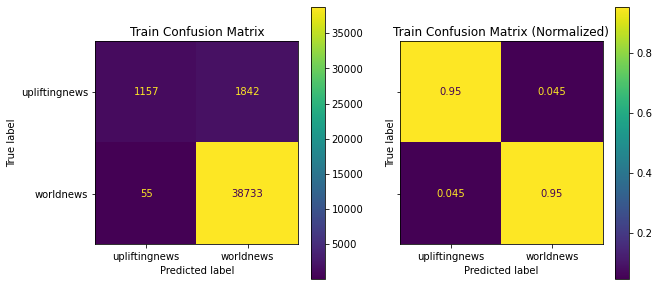

In [163]:
#Confusion matrix and scores for train set
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')
ConfusionMatrixDisplay.from_estimator(lr, X_train_cv, y_train, ax=axes[0]);
axes[0].set_title('Train Confusion Matrix')
ConfusionMatrixDisplay.from_estimator(lr, X_train_cv, y_train, normalize='pred', ax=axes[1]);
axes[1].set_title('Train Confusion Matrix (Normalized)', loc='center');
#plt.tight_layout()
plt.show()

In [115]:
print(classification_report(y_train, lr.predict(X_train_cv)))

               precision    recall  f1-score   support

upliftingnews       0.95      0.39      0.55      2999
    worldnews       0.95      1.00      0.98     38788

     accuracy                           0.95     41787
    macro avg       0.95      0.69      0.76     41787
 weighted avg       0.95      0.95      0.95     41787



In [252]:
print(classification_report(y_test, lr.predict(X_test_cv)))

               precision    recall  f1-score   support

upliftingnews       0.56      0.14      0.23       999
    worldnews       0.94      0.99      0.96     12930

     accuracy                           0.93     13929
    macro avg       0.75      0.57      0.59     13929
 weighted avg       0.91      0.93      0.91     13929



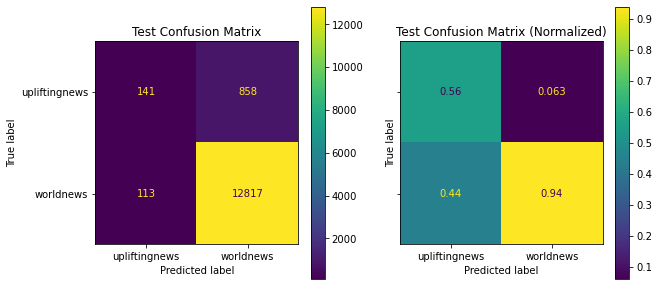

In [155]:
#Confusion matrix and scores for test set
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')
ConfusionMatrixDisplay.from_estimator(lr, X_test_cv, y_test, ax=axes[0]);
axes[0].set_title('Test Confusion Matrix')
ConfusionMatrixDisplay.from_estimator(lr, X_test_cv, y_test, normalize='pred', ax=axes[1]);
axes[1].set_title('Test Confusion Matrix (Normalized)', loc='center');
#plt.tight_layout()
plt.show()

In [112]:
print(classification_report(y_test, preds))

               precision    recall  f1-score   support

upliftingnews       0.56      0.14      0.23       999
    worldnews       0.94      0.99      0.96     12930

     accuracy                           0.93     13929
    macro avg       0.75      0.57      0.59     13929
 weighted avg       0.91      0.93      0.91     13929



In [157]:
balanced_accuracy_score(y_test, preds)

0.5662008876626046

## Dealing with imbalanced data

#### 1. Oversample 'upliftingnews'

In [220]:
pipe = make_pipeline(
    RandomOverSampler(random_state=53),
    LogisticRegression(max_iter=10_000))
pipe.get_params()

{'memory': None,
 'steps': [('randomoversampler', RandomOverSampler(random_state=53)),
  ('logisticregression', LogisticRegression(max_iter=10000))],
 'verbose': False,
 'randomoversampler': RandomOverSampler(random_state=53),
 'logisticregression': LogisticRegression(max_iter=10000),
 'randomoversampler__random_state': 53,
 'randomoversampler__sampling_strategy': 'auto',
 'randomoversampler__shrinkage': None,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 10000,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': 

In [296]:
params1 = {
    'randomoversampler__sampling_strategy': [0.1, 0.25, 0.5, 0.75, 1]
}

In [327]:
params2 = {
    'randomoversampler__sampling_strategy': [0.1, 0.25, 0.5, 0.75, 1],
    'randomoversampler__shrinkage': [.5, 1]
}

In [328]:
gs1 = GridSearchCV(pipe, params1, n_jobs=-1)
gs2 = GridSearchCV(pipe, params2, n_jobs=-1)

In [329]:
gs1.fit(X_train_cv, y_train)

GridSearchCV(estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler(random_state=53)),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'randomoversampler__sampling_strategy': [0.1, 0.25,
                                                                  0.5, 0.75,
                                                                  1]})

In [330]:
gs2.fit(X_train_cv, y_train)

C:\Users\jswil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
49 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
49 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jswil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jswil\anaconda3\lib\site-packages\imblearn\pipeline.py", line 268, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\jswil\anaconda3\lib\site-packages\imblearn\pipeline.py", line 226, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "C:\Users\jswil

GridSearchCV(estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler(random_state=53)),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'randomoversampler__sampling_strategy': [0.1, 0.25,
                                                                  0.5, 0.75,
                                                                  1],
                         'randomoversampler__shrinkage': [0.5, 1]})

In [301]:
gs1.score(X_train_cv, y_train), gs1.score(X_test_cv, y_test)

(0.9582884629190896, 0.9280637518845574)

In [302]:
gs2.score(X_train_cv, y_train), gs2.score(X_test_cv, y_test)

(0.9586713571206356, 0.9287098858496662)

In [303]:
preds_gs1 = gs1.predict(X_test_cv)

In [304]:
print(classification_report(y_test, preds_gs1))

               precision    recall  f1-score   support

upliftingnews       0.50      0.17      0.25       999
    worldnews       0.94      0.99      0.96     12930

     accuracy                           0.93     13929
    macro avg       0.72      0.58      0.61     13929
 weighted avg       0.91      0.93      0.91     13929



In [305]:
gs1.best_estimator_

Pipeline(steps=[('randomoversampler',
                 RandomOverSampler(random_state=53, sampling_strategy=0.1)),
                ('logisticregression', LogisticRegression(max_iter=10000))])

In [306]:
gs2.best_estimator_

Pipeline(steps=[('randomoversampler',
                 RandomOverSampler(random_state=53, sampling_strategy=0.1,
                                   shrinkage=0.5)),
                ('logisticregression', LogisticRegression(max_iter=10000))])

In [307]:
pd.DataFrame(gs1.cv_results_)['mean_test_score']

0    0.925479
1    0.912102
2    0.891330
3    0.877402
4    0.865604
Name: mean_test_score, dtype: float64

In [308]:
pd.DataFrame(gs1.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.757814      0.399090         0.026584        0.005310   
1       3.365160      0.326130         0.029743        0.002879   
2       4.177989      0.376872         0.020042        0.003661   
3       4.936534      0.404249         0.017970        0.002891   
4       4.547632      0.483677         0.012499        0.006249   

  param_randomoversampler__sampling_strategy  \
0                                        0.1   
1                                       0.25   
2                                        0.5   
3                                       0.75   
4                                          1   

                                           params  split0_test_score  \
0   {'randomoversampler__sampling_strategy': 0.1}           0.925461   
1  {'randomoversampler__sampling_strategy': 0.25}           0.910983   
2   {'randomoversampler__sampling_strategy': 0.5}           0.891721   
3  {'randomoversampler__sampling_strategy': 0.75}           0.878201   
4     {'randomoversampler__sampling_strategy': 1}           0.868150   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.926777           0.926648           0.923776           0.924734   
1           0.916009           0.913486           0.907742           0.912289   
2           0.897224           0.891588           0.885964           0.890152   
3           0.884063           0.877707           0.871724           0.875314   
4           0.870304           0.865143           0.859639           0.864784   

   mean_test_score  std_test_score  rank_test_score  
0         0.925479        0.001141                1  
1         0.912102        0.002738                2  
2         0.891330        0.003610                3  
3         0.877402        0.004042                4  
4         0.865604        0.003607                5

In [309]:
print(classification_report(y_train, gs1.predict(X_train_cv)))

               precision    recall  f1-score   support

upliftingnews       0.91      0.46      0.62      2999
    worldnews       0.96      1.00      0.98     38788

     accuracy                           0.96     41787
    macro avg       0.94      0.73      0.80     41787
 weighted avg       0.96      0.96      0.95     41787



In [310]:
print(classification_report(y_train, gs2.predict(X_train_cv)))

               precision    recall  f1-score   support

upliftingnews       0.91      0.47      0.62      2999
    worldnews       0.96      1.00      0.98     38788

     accuracy                           0.96     41787
    macro avg       0.93      0.73      0.80     41787
 weighted avg       0.96      0.96      0.95     41787



In [311]:
print(classification_report(y_test, gs1.predict(X_test_cv)))

               precision    recall  f1-score   support

upliftingnews       0.50      0.17      0.25       999
    worldnews       0.94      0.99      0.96     12930

     accuracy                           0.93     13929
    macro avg       0.72      0.58      0.61     13929
 weighted avg       0.91      0.93      0.91     13929



In [312]:
print(classification_report(y_test, gs2.predict(X_test_cv)))

               precision    recall  f1-score   support

upliftingnews       0.51      0.18      0.27       999
    worldnews       0.94      0.99      0.96     12930

     accuracy                           0.93     13929
    macro avg       0.72      0.58      0.62     13929
 weighted avg       0.91      0.93      0.91     13929



In [313]:
gs3 = GridSearchCV(pipe, params1, n_jobs=-1, scoring = 'balanced_accuracy')
gs4 = GridSearchCV(pipe, params2, n_jobs=-1, scoring = 'balanced_accuracy')

In [314]:
gs3.fit(X_train_cv, y_train)

GridSearchCV(estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler(random_state=53)),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'randomoversampler__sampling_strategy': [0.1, 0.25,
                                                                  0.5, 0.75,
                                                                  1]},
             scoring='balanced_accuracy')

In [315]:
gs4.fit(X_train_cv, y_train)

C:\Users\jswil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
99 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
99 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jswil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jswil\anaconda3\lib\site-packages\imblearn\pipeline.py", line 268, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\jswil\anaconda3\lib\site-packages\imblearn\pipeline.py", line 226, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "C:\Users\jswi

GridSearchCV(estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler(random_state=53)),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'randomoversampler__sampling_strategy': [0.1, 0.25,
                                                                  0.5, 0.75,
                                                                  1],
                         'randomoversampler__shrinkage': [0.5, 1, 2, 3]},
             scoring='balanced_accuracy')

In [316]:
gs3.score(X_train_cv, y_train), gs3.score(X_test_cv, y_test)


(0.9572966133945235, 0.6777189021968605)

In [317]:
gs4.score(X_train_cv, y_train), gs4.score(X_test_cv, y_test)

(0.7337609537303057, 0.5842852132875335)

In [318]:
gs1.score(X_train_cv, y_train), gs1.score(X_test_cv, y_test)

(0.9582884629190896, 0.9280637518845574)

In [319]:
gs1.best_params_

{'randomoversampler__sampling_strategy': 0.1}

In [331]:
gs2.best_params_

{'randomoversampler__sampling_strategy': 0.1,
 'randomoversampler__shrinkage': 0.5}

In [321]:
gs3.best_params_

{'randomoversampler__sampling_strategy': 1}

In [322]:
gs4.best_params_

{'randomoversampler__sampling_strategy': 0.1,
 'randomoversampler__shrinkage': 0.5}

In [323]:
accuracy_score(y_test, gs1.predict(X_test_cv)), accuracy_score(y_test, gs2.predict(X_test_cv))

(0.9280637518845574, 0.9287098858496662)

In [324]:
balanced_accuracy_score(y_test, gs1.predict(X_test_cv)), balanced_accuracy_score(y_test, gs2.predict(X_test_cv))

(0.5783952165622699, 0.5842852132875335)

In [325]:
accuracy_score(y_test, gs3.predict(X_test_cv)), accuracy_score(y_test, gs4.predict(X_test_cv))

(0.8646708306411085, 0.9287098858496662)

In [326]:
balanced_accuracy_score(y_test, gs3.predict(X_test_cv)), balanced_accuracy_score(y_test, gs4.predict(X_test_cv))

(0.6777189021968605, 0.5842852132875335)

##### Takeaways - scoring=balanced_accuracy improves balance score, but hurts other metrics.  Sampling strategy of .1 is usually selected, except for gs3(scoring_balanced and shrinkage=default) which selected 1.  shrinkage of .5 is selected when available, but doesn't seem to help scores

#### 1. Create synthetic data similar to 'upliftingnews' class

#### Smote

In [337]:
pipe_synth = make_pipeline(
    SMOTE(random_state=53),
    LogisticRegression(max_iter=10_000)
)

In [347]:
pipe_synth.get_params()

{'memory': None,
 'steps': [('smote', SMOTE(random_state=53)),
  ('logisticregression', LogisticRegression(max_iter=10000))],
 'verbose': False,
 'smote': SMOTE(random_state=53),
 'logisticregression': LogisticRegression(max_iter=10000),
 'smote__k_neighbors': 5,
 'smote__n_jobs': None,
 'smote__random_state': 53,
 'smote__sampling_strategy': 'auto',
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 10000,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

In [358]:
params_synth = {
    'smote__k_neighbors': [5, 20, 50],
    'logisticregression__C': [.1, 1, 10],
}

In [359]:
gs_synth = GridSearchCV(pipe_synth, params_synth, n_jobs=-1)
gs_synth_bal = GridSearchCV(pipe_synth, params_synth, n_jobs=-1, scoring='balanced_accuracy')

In [360]:
gs_synth.fit(X_train_cv, y_train)

GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE(random_state=53)),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 1, 10],
                         'smote__k_neighbors': [5, 20, 50]})

In [361]:
gs_synth_bal.fit(X_train_cv, y_train)

GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE(random_state=53)),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 1, 10],
                         'smote__k_neighbors': [5, 20, 50]},
             scoring='balanced_accuracy')

In [362]:
gs_synth.best_estimator_

Pipeline(steps=[('smote', SMOTE(k_neighbors=50, random_state=53)),
                ('logisticregression',
                 LogisticRegression(C=1, max_iter=10000))])

In [363]:
gs_synth_bal.best_estimator_

Pipeline(steps=[('smote', SMOTE(random_state=53)),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=10000))])

In [364]:
gs_synth.score(X_train_cv, y_train), gs_synth.score(X_test_cv, y_test)

(0.9265321750783737, 0.8709167923038266)

In [365]:
gs_synth_bal.score(X_train_cv, y_train), gs_synth_bal.score(X_test_cv, y_test)

(0.703328475343763, 0.6619592910776205)

In [366]:
print(classification_report(y_test, gs_synth.predict(X_test_cv)))

               precision    recall  f1-score   support

upliftingnews       0.25      0.41      0.31       999
    worldnews       0.95      0.91      0.93     12930

     accuracy                           0.87     13929
    macro avg       0.60      0.66      0.62     13929
 weighted avg       0.90      0.87      0.88     13929



In [367]:
print(classification_report(y_test, gs_synth_bal.predict(X_test_cv)))

               precision    recall  f1-score   support

upliftingnews       0.21      0.45      0.29       999
    worldnews       0.95      0.87      0.91     12930

     accuracy                           0.84     13929
    macro avg       0.58      0.66      0.60     13929
 weighted avg       0.90      0.84      0.87     13929



In [371]:
accuracy_score(y_test, gs_synth.predict(X_test_cv)), accuracy_score(y_test, gs_synth_bal.predict(X_test_cv))

(0.8709167923038266, 0.8422715198506713)

In [370]:
balanced_accuracy_score(y_test, gs_synth.predict(X_test_cv)), balanced_accuracy_score(y_test, gs_synth_bal.predict(X_test_cv))

(0.656606142104982, 0.6619592910776205)

In [379]:
params_synth_hiKNN = {
    'smote__k_neighbors': [50, 200, 400],
    'logisticregression__C': [1],
}

In [380]:
gs_synth_hiKNN = GridSearchCV(pipe_synth, params_synth_hiKNN, n_jobs=-1)

In [381]:
gs_synth_hiKNN.fit(X_train_cv, y_train)

GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE(random_state=53)),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [1],
                         'smote__k_neighbors': [50, 200, 400]})

In [382]:
gs_synth_hiKNN.best_params_

{'logisticregression__C': 1, 'smote__k_neighbors': 200}

In [383]:
print(classification_report(y_test, gs_synth_hiKNN.predict(X_test_cv)))

               precision    recall  f1-score   support

upliftingnews       0.26      0.41      0.32       999
    worldnews       0.95      0.91      0.93     12930

     accuracy                           0.87     13929
    macro avg       0.61      0.66      0.62     13929
 weighted avg       0.90      0.87      0.89     13929



##### Takeaways - neither performs better than baseline
gs_synth tends to choose highest # of kneighbors(up to 200) and C=1, gssynth_bal chooses C=0.1, does not specify which knn,  
note - c is inverse of regulation strength - high value of c gives more weight to training data with less regulation. Lower c means more regulation

#### ADASYN

In [391]:
pipe_adasyn = make_pipeline(
    ADASYN(random_state=53),
    LogisticRegression(max_iter=10_000)
)

In [399]:
pipe_adasyn.get_params()

{'memory': None,
 'steps': [('adasyn', ADASYN(random_state=53)),
  ('logisticregression', LogisticRegression(max_iter=10000))],
 'verbose': False,
 'adasyn': ADASYN(random_state=53),
 'logisticregression': LogisticRegression(max_iter=10000),
 'adasyn__n_jobs': None,
 'adasyn__n_neighbors': 5,
 'adasyn__random_state': 53,
 'adasyn__sampling_strategy': 'auto',
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 10000,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

In [425]:
params_adasyn = {
    'adasyn__n_neighbors': [50, 200, 300],
    'logisticregression__C':[.1, 1, 10]
}

In [426]:
gs_adasyn = GridSearchCV(pipe_adasyn, params_adasyn, n_jobs=-1)
gs_adasyn_bal = GridSearchCV(pipe_adasyn, params_adasyn, n_jobs=-1, scoring='balanced_accuracy')

In [427]:
gs_adasyn.fit(X_train_cv, y_train)

C:\Users\jswil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jswil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jswil\anaconda3\lib\site-packages\imblearn\pipeline.py", line 268, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\jswil\anaconda3\lib\site-packages\imblearn\pipeline.py", line 226, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "C:\Users\jswil\a

GridSearchCV(estimator=Pipeline(steps=[('adasyn', ADASYN(random_state=53)),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'adasyn__n_neighbors': [50, 200, 300],
                         'logisticregression__C': [0.1, 1, 10]})

In [428]:
gs_adasyn_bal.fit(X_train_cv, y_train)

C:\Users\jswil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jswil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jswil\anaconda3\lib\site-packages\imblearn\pipeline.py", line 268, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\jswil\anaconda3\lib\site-packages\imblearn\pipeline.py", line 226, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "C:\Users\jswil\a

GridSearchCV(estimator=Pipeline(steps=[('adasyn', ADASYN(random_state=53)),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'adasyn__n_neighbors': [50, 200, 300],
                         'logisticregression__C': [0.1, 1, 10]},
             scoring='balanced_accuracy')

In [429]:
gs_adasyn.best_estimator_

Pipeline(steps=[('adasyn', ADASYN(n_neighbors=200, random_state=53)),
                ('logisticregression',
                 LogisticRegression(C=1, max_iter=10000))])

In [430]:
gs_adasyn_bal.best_estimator_

Pipeline(steps=[('adasyn', ADASYN(n_neighbors=200, random_state=53)),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=10000))])

In [431]:
accuracy_score(y_train, gs_adasyn.predict(X_train_cv)), accuracy_score(y_test, gs_adasyn.predict(X_test_cv))

(0.9272501017062723, 0.873860291478211)

In [432]:
accuracy_score(y_train, gs_adasyn_bal.predict(X_train_cv)), accuracy_score(y_test, gs_adasyn_bal.predict(X_test_cv))

(0.8770909613037547, 0.854476272524948)

In [433]:
print(classification_report(y_test, gs_adasyn.predict(X_test_cv)))

               precision    recall  f1-score   support

upliftingnews       0.26      0.41      0.32       999
    worldnews       0.95      0.91      0.93     12930

     accuracy                           0.87     13929
    macro avg       0.61      0.66      0.62     13929
 weighted avg       0.90      0.87      0.89     13929



In [434]:
print(classification_report(y_test, gs_adasyn_bal.predict(X_test_cv)))

               precision    recall  f1-score   support

upliftingnews       0.23      0.43      0.30       999
    worldnews       0.95      0.89      0.92     12930

     accuracy                           0.85     13929
    macro avg       0.59      0.66      0.61     13929
 weighted avg       0.90      0.85      0.87     13929



##### Takeaways - similar to SMOTE, picked highest kn, C=1 for score=default and C=.1 for score=bal. Slightly better scores than SMOTE, still not as good as baseline

#### LR with overweight minority class

In [436]:
lr_weight = LogisticRegression(max_iter=10_000, class_weight='balanced')
lr_weight.fit(X_train_cv, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [437]:
lr_weight.score(X_train_cv, y_train), lr_weight.score(X_test_cv, y_test)

(0.9306004259697992, 0.8577787350132816)

In [438]:
print(classification_report(y_train, lr_weight.predict(X_train_cv)))

               precision    recall  f1-score   support

upliftingnews       0.51      0.97      0.67      2999
    worldnews       1.00      0.93      0.96     38788

     accuracy                           0.93     41787
    macro avg       0.75      0.95      0.81     41787
 weighted avg       0.96      0.93      0.94     41787



In [439]:
print(classification_report(y_test, lr_weight.predict(X_test_cv)))

               precision    recall  f1-score   support

upliftingnews       0.25      0.49      0.33       999
    worldnews       0.96      0.89      0.92     12930

     accuracy                           0.86     13929
    macro avg       0.60      0.69      0.63     13929
 weighted avg       0.91      0.86      0.88     13929



##### takeaways - close to gr1 and gr1, but still less than bseline on test set

### Change class cutoff threshold

In [440]:
lr_weight.predict(X_test_cv)

array(['upliftingnews', 'worldnews', 'worldnews', ..., 'worldnews',
       'worldnews', 'worldnews'], dtype=object)

In [441]:
lr_weight.predict_proba(X_test_cv)

array([[0.84302381, 0.15697619],
       [0.00113437, 0.99886563],
       [0.00205157, 0.99794843],
       ...,
       [0.00738063, 0.99261937],
       [0.10023057, 0.89976943],
       [0.01659403, 0.98340597]])

In [480]:
prob_1 = lr_weight.predict_proba(X_test_cv)[:, 1]

In [481]:
prob_1

array([0.15697619, 0.99886563, 0.99794843, ..., 0.99261937, 0.89976943,
       0.98340597])

In [482]:
(prob_1 >= 0.5).sum()           #all predicted worldnews

11969

In [483]:
(prob_1 < 0.5).sum()           #all predicted upliftingnews

1960

In [486]:
new_preds = np.where(prob_1>.45, 1, 0)
new_preds[:20]

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [487]:
(new_preds >= 0.5).sum()           #all predicted upliftingnews

12205

In [488]:
(new_preds < 0.5).sum()           #all predicted upliftingnews

1724

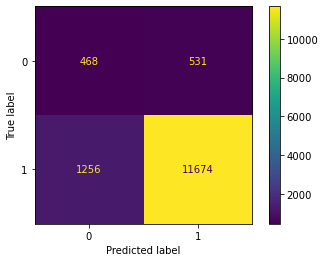

In [490]:
ConfusionMatrixDisplay.from_predictions(np.where(y_test=='upliftingnews', 0, 1), new_preds);

In [ ]:
##### takeaways - this is not a good idea for this data

### DecisionTreeClassifier

In [27]:
#CountVectorizer
dtc_cv = DecisionTreeClassifier()
dtc_cv.fit(X_train_cv, y_train)
dtc_cv.score(X_train_cv, y_train), dtc_cv.score(X_test_cv, y_test)

(0.9853782276784646, 0.8916648718500969)

In [28]:
#TfidfVectorizer
dtc_tf = DecisionTreeClassifier()
dtc_tf.fit(X_train_tf, y_train)
dtc_tf.score(X_train_tf, y_train), dtc_tf.score(X_test_tf, y_test)

(0.985354296790868, 0.893172517768684)

### RandomForestClassifier

In [29]:
#CountVectorizer
rfc_cv = RandomForestClassifier()
rfc_cv.fit(X_train_cv, y_train)
rfc_cv.score(X_train_cv, y_train), rfc_cv.score(X_test_cv, y_test)

(0.985354296790868, 0.9208126929427812)

In [30]:
#TfidfVectorizer
rfc_tf = RandomForestClassifier()
rfc_tf.fit(X_train_tf, y_train)
rfc_tf.score(X_train_tf, y_train), rfc_tf.score(X_test_tf, y_test)

(0.9852825041280782, 0.9231818508148467)

### ExtraTreesClassifier

In [31]:
#CountVectorizer
etc_cv = ExtraTreesClassifier()
etc_cv.fit(X_train_cv, y_train)
etc_cv.score(X_train_cv, y_train), etc_cv.score(X_test_cv, y_test)

(0.9853782276784646, 0.9135616340010051)

In [32]:
#TfidfVectorizer
etc_tf = ExtraTreesClassifier()
etc_tf.fit(X_train_tf, y_train)
etc_tf.score(X_train_tf, y_train), etc_tf.score(X_test_tf, y_test)

(0.985354296790868, 0.9188024983846651)

### K-Nearest Neighbors

In [33]:
#CountVectorizer
knn_cv = KNeighborsClassifier()
knn_cv.fit(X_train_cv, y_train)
knn_cv.score(X_train_cv, y_train), knn_cv.score(X_test_cv, y_test)

(0.9322037954387729, 0.9274176179194487)

In [34]:
#TfidfVectorizer
knn_tf = KNeighborsClassifier()
knn_tf.fit(X_train_tf, y_train)
knn_tf.score(X_train_tf, y_train), knn_tf.score(X_test_tf, y_test)

(0.9317012467992438, 0.9296431904659344)

### Support Vector Classifier

In [166]:
#countVectorizer
svc_cv = SVC()
svc_cv.fit(X_train_cv, y_train)
svc_cv.score(X_train_cv, y_train), svc_cv.score(X_test_cv, y_test)

(0.9496015507215163, 0.9285663005240864)

In [167]:
#TfidfVectorizer
svc_tf = SVC()
svc_tf.fit(X_train_tf, y_train)
svc_tf.score(X_train_tf, y_train), svc_tf.score(X_test_tf, y_test)

(0.9516835379424223, 0.9284945078612966)

### Voting Classifier

In [35]:
vc_cv = VotingClassifier([
    ('knn', KNeighborsClassifier()),
    ('lr', LogisticRegression()),
    ('dtr', Dec

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_7888/1626916281.py, line 4)